In [1]:
import pandas as pd

from pycaret.classification import *

In [2]:
from pycaret.datasets import get_data

juice = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [3]:
setup(
    juice,
    target='Purchase'
)

,Description,Value
0,Session id,5243
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Numeric features,17
9,Categorical features,1


d:\dev\venv\Lib\site-packages\pycaret\internal\metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8157,0.0000,0.8157,0.8181,0.8149,0.6109,0.6144,0.0230
ridge,Ridge Classifier,0.8104,0.0000,0.8104,0.8134,0.8090,0.5986,0.6033,0.0330
lr,Logistic Regression,0.8090,0.0000,0.8090,0.8101,0.8070,0.5930,0.5970,0.8560
ada,Ada Boost Classifier,0.7984,0.0000,0.7984,0.7994,0.7957,0.5685,0.5734,0.0580
gbc,Gradient Boosting Classifier,0.7930,0.0000,0.7930,0.7955,0.7922,0.5640,0.5670,0.0740
rf,Random Forest Classifier,0.7663,0.0000,0.7663,0.7674,0.7645,0.5046,0.5079,0.0810
xgboost,Extreme Gradient Boosting,0.7569,0.0000,0.7569,0.7565,0.7545,0.4825,0.4853,0.2260
lightgbm,Light Gradient Boosting Machine,0.7543,0.0000,0.7543,0.7544,0.7524,0.4787,0.4812,0.1450
et,Extra Trees Classifier,0.7423,0.0000,0.7423,0.7450,0.7407,0.4564,0.4602,0.0700
dt,Decision Tree Classifier,0.7329,0.0000,0.7329,0.7359,0.7313,0.4371,0.4409,0.0420


d:\dev\venv\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [5]:
top_3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8157,0.0000,0.8157,0.8181,0.8149,0.6109,0.6144,0.0220
ridge,Ridge Classifier,0.8104,0.0000,0.8104,0.8134,0.8090,0.5986,0.6033,0.0210
lr,Logistic Regression,0.8090,0.0000,0.8090,0.8101,0.8070,0.5930,0.5970,0.0750
ada,Ada Boost Classifier,0.7984,0.0000,0.7984,0.7994,0.7957,0.5685,0.5734,0.0520
gbc,Gradient Boosting Classifier,0.7930,0.0000,0.7930,0.7955,0.7922,0.5640,0.5670,0.0740
rf,Random Forest Classifier,0.7663,0.0000,0.7663,0.7674,0.7645,0.5046,0.5079,0.0840
xgboost,Extreme Gradient Boosting,0.7569,0.0000,0.7569,0.7565,0.7545,0.4825,0.4853,0.0390
lightgbm,Light Gradient Boosting Machine,0.7543,0.0000,0.7543,0.7544,0.7524,0.4787,0.4812,0.1020
et,Extra Trees Classifier,0.7423,0.0000,0.7423,0.7450,0.7407,0.4564,0.4602,0.0690
dt,Decision Tree Classifier,0.7329,0.0000,0.7329,0.7359,0.7313,0.4371,0.4409,0.0240


d:\dev\venv\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [6]:
top_3

[LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=5243, solver='auto',
                 tol=0.0001),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=5243, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)]

In [8]:
lr = create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:34:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.0000,0.8133,0.8119,0.8120,0.6014,0.6023
1,0.8267,0.0000,0.8267,0.8320,0.8280,0.6414,0.6436
2,0.8533,0.0000,0.8533,0.8584,0.8545,0.6966,0.6990
3,0.8133,0.0000,0.8133,0.8119,0.8120,0.6014,0.6023
4,0.8267,0.0000,0.8267,0.8280,0.8272,0.6369,0.6371
5,0.8933,0.0000,0.8933,0.9006,0.8904,0.7662,0.7782
6,0.7333,0.0000,0.7333,0.7305,0.7227,0.4076,0.4195
7,0.7867,0.0000,0.7867,0.7852,0.7836,0.5455,0.5490
8,0.7733,0.0000,0.7733,0.7748,0.7739,0.5304,0.5306


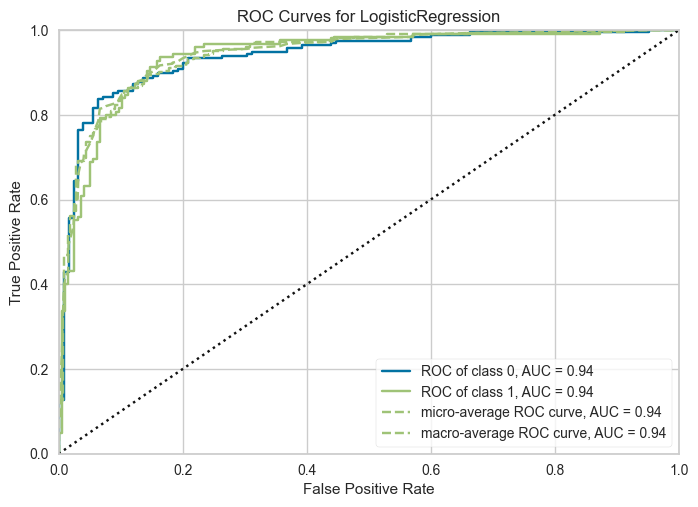

In [9]:
plot_model(estimator=lr, plot='auc')

In [10]:
# auc = area under curve

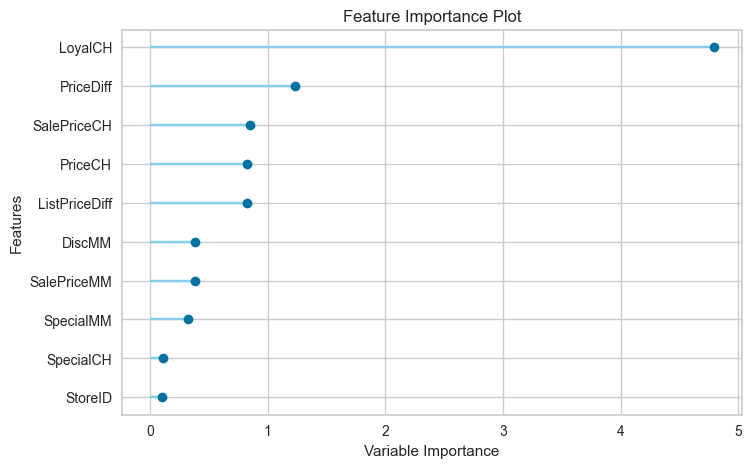

In [11]:
plot_model(estimator=lr, plot='feature')

In [12]:
rd = create_model('ridge')
lgm = create_model('lightgbm')

blend = blend_models(estimator_list=[lgm, lr, rd])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.7981,0.7977,0.5701,0.5722
1,0.8267,0.0000,0.8267,0.8378,0.8286,0.6458,0.6519
2,0.8667,0.0000,0.8667,0.8742,0.8679,0.7259,0.7303
3,0.8133,0.0000,0.8133,0.8119,0.8120,0.6014,0.6023
4,0.8000,0.0000,0.8000,0.8189,0.8025,0.5963,0.6072
5,0.8933,0.0000,0.8933,0.8955,0.8916,0.7692,0.7744
6,0.7600,0.0000,0.7600,0.7576,0.7535,0.4739,0.4813
7,0.7867,0.0000,0.7867,0.7852,0.7836,0.5455,0.5490
8,0.7867,0.0000,0.7867,0.7867,0.7867,0.5556,0.5556


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.0000,0.7867,0.7848,0.7851,0.5444,0.5453
1,0.7067,0.0000,0.7067,0.7109,0.7083,0.3893,0.3899
2,0.7733,0.0000,0.7733,0.7925,0.7762,0.5425,0.5524
3,0.7200,0.0000,0.7200,0.7159,0.7168,0.3982,0.3996
4,0.8133,0.0000,0.8133,0.8133,0.8133,0.6064,0.6064
5,0.8267,0.0000,0.8267,0.8258,0.8261,0.6322,0.6325
6,0.6933,0.0000,0.6933,0.6886,0.6898,0.3408,0.3421
7,0.8267,0.0000,0.8267,0.8259,0.8262,0.6369,0.6371
8,0.6800,0.0000,0.6800,0.6747,0.6754,0.3182,0.3203


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.0000,0.8133,0.8119,0.8120,0.6014,0.6023
1,0.8267,0.0000,0.8267,0.8320,0.8280,0.6414,0.6436
2,0.8533,0.0000,0.8533,0.8584,0.8545,0.6966,0.6990
3,0.8133,0.0000,0.8133,0.8119,0.8120,0.6014,0.6023
4,0.8267,0.0000,0.8267,0.8378,0.8286,0.6458,0.6519
5,0.8933,0.0000,0.8933,0.8955,0.8916,0.7692,0.7744
6,0.7467,0.0000,0.7467,0.7441,0.7382,0.4410,0.4506
7,0.7733,0.0000,0.7733,0.7713,0.7710,0.5198,0.5217
8,0.7733,0.0000,0.7733,0.7748,0.7739,0.5304,0.5306


In [15]:
optimize_threshold(lgm)

Threshold: 0.375. Accuracy: 0.761
Threshold: 0.125. Accuracy: 0.7516
Threshold: 0.5. Accuracy: 0.7543
Threshold: 0.25. Accuracy: 0.765
Threshold: 0.625. Accuracy: 0.7503
Threshold: 0.75. Accuracy: 0.749
Threshold: 0.875. Accuracy: 0.7463
Threshold: 0.0. Accuracy: 0.3899
Threshold: 0.25. Accuracy: 0.765
Threshold: 0.2500000149011612. Accuracy: 0.765
Threshold: 0.21875. Accuracy: 0.769
Threshold: 0.09375. Accuracy: 0.7517
Threshold: 0.3125. Accuracy: 0.773
Threshold: 0.1875. Accuracy: 0.7677
Threshold: 0.34375. Accuracy: 0.7704
Threshold: 0.4375. Accuracy: 0.7636
Threshold: 0.46875. Accuracy: 0.761
Threshold: 0.5625. Accuracy: 0.7556
Threshold: 0.59375. Accuracy: 0.7556
Threshold: 0.6875. Accuracy: 0.753
Threshold: 0.71875. Accuracy: 0.749
Threshold: 0.8125. Accuracy: 0.7529
Threshold: 0.84375. Accuracy: 0.753
Threshold: 0.9375. Accuracy: 0.741
Threshold: 0.0625. Accuracy: 0.721
Threshold: 0.96875. Accuracy: 0.7063
Threshold: 0.21875. Accuracy: 0.769
Threshold: 0.2187500149011612. Accura

KeyboardInterrupt: 

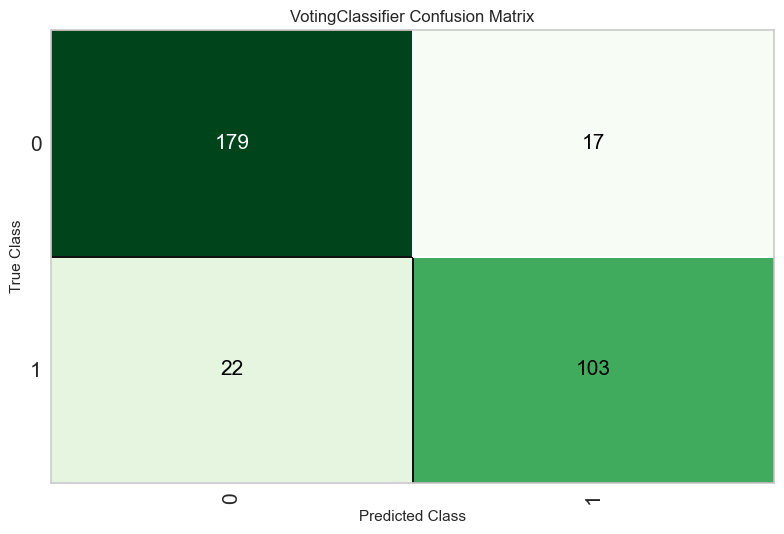

In [16]:
plot_model(estimator=blend, plot='confusion_matrix')

In [17]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…